#### Goal Metric:
- aligns with company's vision and mission
- reflects what company cares about
- simple to communicate with stakeholders
- stable over long period of time
- May not be suitable for experiments
  - Difficult to measure
  - Not sensitive enough to product changes
  - E.g. FB cares about revenue but not every team uses it for experiments
    - Teams may work on
      - Improving user experience
      - Apps & web performance
- Names
  - Success Metrics
  - Primary Metric
  - OKR () Metric
  - North Star Metric
- Examples: DAU, revenue, ad-revenue


#### Driver Metric:
- Aligns with Goal Metric
- More sensitive to feature changes and actionable
- Success metric (Goal Metric) $\neq$ Driver Metric
  - long-term vs short term
  - not suitable for experiments vs suitable for experiments (usually)
- Names
  - Surrogate Metric
  - Indirect / predictive metreic

#### Gaurdrail Metrics
- Types
  - Organzational Gaurdrail Metric
    - Negative $\rightarrow$ buisness suffers loss
    - Page Loading Latency: Loading time increases a few ms $\rightarrow$ loss of customers & revenue
    - Errors per page
    - Client crashes
  - Trustworthy-related metrics
    - Randomization units assigned to variatss should be random (SUTVA)
      - If proportions change $\rightarrow$ sample ratio mismatch (SRM)
        - t-test or chi-squared test

#### Applications of metrics:
- Context is important
- Same metric can be used differently by different teams
- One team's driver metric can be other teams guardrail metric
- Examples
  - Front End Team
    - Goal metric: reducing latency
    - Driver metric: time to interactive (TTI)
  - Product team
    - Guardrail metric: time to interactive (TTI)
- Attributes of good metric:
  - Simple to explain, remeber and discuss
  - clear definition and no ambiguity in interpretation
  - Actionable and sensitive 
  - Not gamable
    - Experiment shows improvement but actually no improvement
    - No real insights
    - eg. short-term revenue
      - increase prices $\rightarrow$ increase revenue
      - loses customers

#### Metrics for experimentation
- Attributes
  - Measurable
    - able to calculate metrics with data collected during the experiment period
  - Attributable
    - able to attribute metrics to experiment variants
  - sensitive and timely
    - should be sensitive enough to detect changes in a timely fashion
- In online experiment we choose
  - A few driver metrics
  - A few guardrail metrics
- Driver mertric $\rightarrow$ overall evaluation criteriom (OEC)
  - weighted combination
  - use as criteria for experiment

### Z-Test for bernoulli Samples.


Experiment: Test color of button

$Click Through Probability = \frac{N_{users-who-clicked}}{N_{Total-Users}}$

Observations:
- Control = 1.1%
- Treatrment = 2.3%  

Practical Significance Boundary = 0.01
Significance Level $\alpha$ = 0.05

Click / No Click (Bernoulli)
Statistically Significant??
Launch??

In [38]:
import numpy as np

In [39]:
p_C = 1.1/100
p_T = 2.3/100

n = 1000
mu_C = n*p_C
mu_T = n*p_T

X_C, X_T = mu_C, mu_T
X_C, X_T

(11.000000000000002, 23.0)

Test Statistic follows Z distribution (Standard Normal)

- Measurement:
  - Users Clicked $X_C$ ande $X_T$
  - Total Number of Users $n_C$ and $n_T$

In [40]:
phat_C = X_C/n
phat_T = X_T/n
phat_C, phat_T

(0.011000000000000001, 0.023)

Null Hypothesis

$\Delta = \hat{p_T} - \hat{p_C}$

$H_0: p_T = p_C$

$H_A: p_T \neq p_C$

$\hat{\Delta}(\hat{\delta}) \sim N(0, SE^2)$

$TS = \frac{\hat{p_T} - \hat{p_C}}{SE} = \frac{\Delta}{SE}$

In [41]:
delta = phat_T -  phat_C
delta

0.011999999999999999

- SE can represent both groups
- Pooled SE

$p_{pooled} = \frac{X_C + X_T}{n_C + n_T}$

In [42]:
phat_pooled = (X_C + X_T)/ (n + n)
phat_pooled

0.017

$s_{pool} = \sqrt{\hat{p} (1 - \hat{p}) (\frac{1}{n_C} + \frac{1}{n_T})}$

In [43]:
s_pool  = np.sqrt(phat_pooled * (1 - phat_pooled)*(2/n))
s_pool

0.005781176350882232

$TS = \frac{\hat{p_T} - \hat{p_C}}{SE} = \frac{\Delta}{SE}$

In [44]:
TS = (phat_T - phat_C)/s_pool
TS

2.0757021186819093

critical z-score value ($\alpha$ = 0.05) = 1.96

In [45]:
print("Statistically Significant : ", TS>1.96 or TS<(-1.96))

Statistically Significant :  True


In [46]:
mean_CI = delta
width_CI = 1.96*s_pool
l, u = mean_CI - width_CI , mean_CI + width_CI
l,u

(0.0006688943522708234, 0.023331105647729174)

In [47]:
print(f"Statistical Significance (TS={TS}): ", TS>1.96 or TS<(-1.96))

d_min = 0.01
print("Practical Significance : ", not (l<=d_min and u>d_min))

Statistical Significance (TS=2.0757021186819093):  True
Practical Significance :  False


### Two Sample t-Test of means (Unknown Equal Variance Assumption, Compute pooled variance)



Experiment: If a new feature changes average number if posts
- 30 users each for control and treatment
- practical significance = 0.05
- significance level $\alpha$ = 0.05

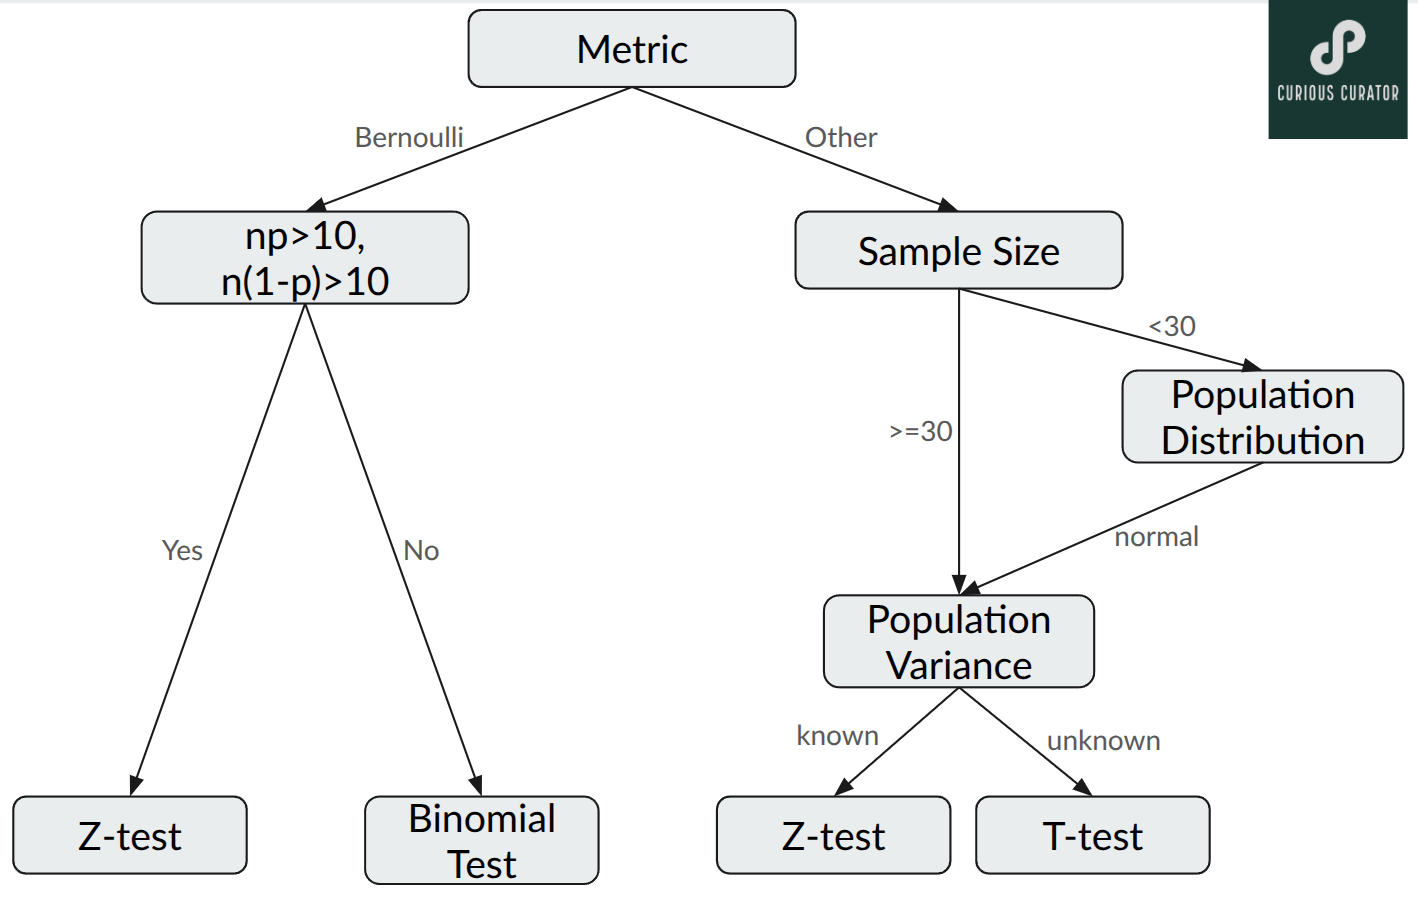

In [48]:
D_C = [1,0,1,3,2,1,0,1,3,2,1,0,1,3,2,1,0,1,3,2,1,0,1,3,2,1,0,1,3,2]
N_C = 30
D_T = [0,1,3,2,1,2,1,3,2,1,0,2,3,2,1,0,2,3,2,1,0,2,3,2,1,0,2,3,2,4]
N_T = 30

In [49]:
import numpy as np
D_C = np.array(D_C)
mu_C = np.mean(D_C)


D_T = np.array(D_T)
mu_T = np.mean(D_T)



In [50]:
delta = mu_T - mu_C
mu_C, mu_T, delta

(1.4, 1.7, 0.30000000000000004)

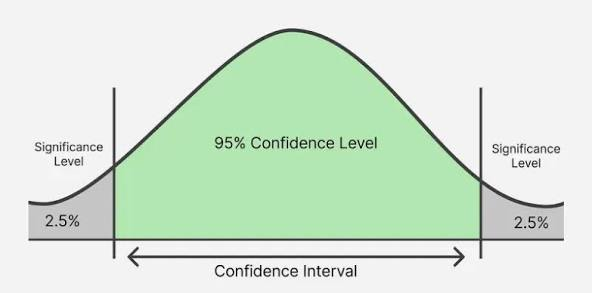

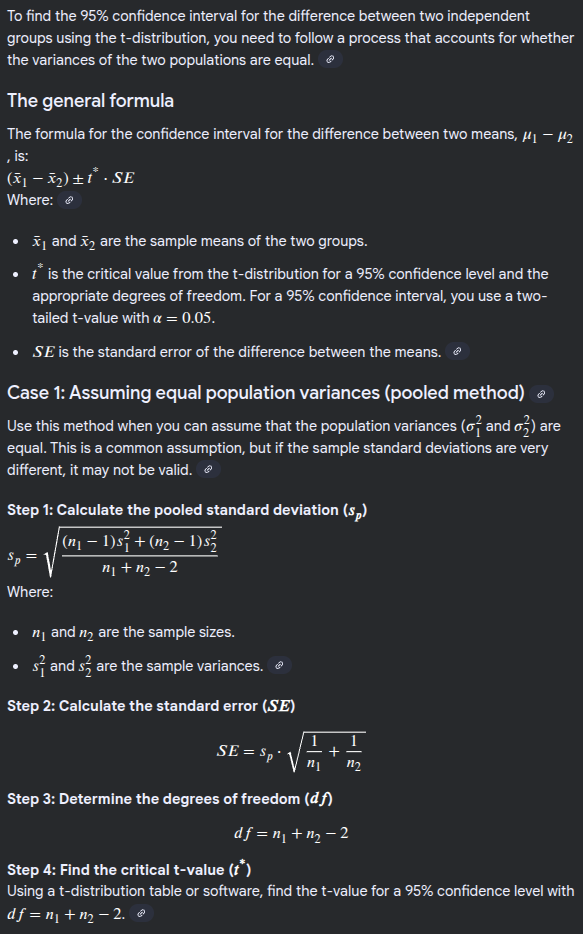

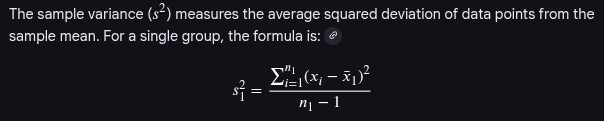

In [51]:

SS_C = np.sum(np.square(D_C - mu_C))
SS_T = np.sum(np.square(D_T - mu_T))
df = N_C - 1 + N_T -1

S_p = np.sqrt((SS_C + SS_T)/df)
SE_pool = (S_p*(np.sqrt(1/N_C + 1/N_T)))
df, S_p, SE_pool

(58, 1.0626901452575845, 0.2743854156507577)

In [52]:
# test statistic
TS = delta/SE_pool
TS

1.0933525722877524

critical t-score value ($\alpha$ = 0.05, df=58) = 2.002 

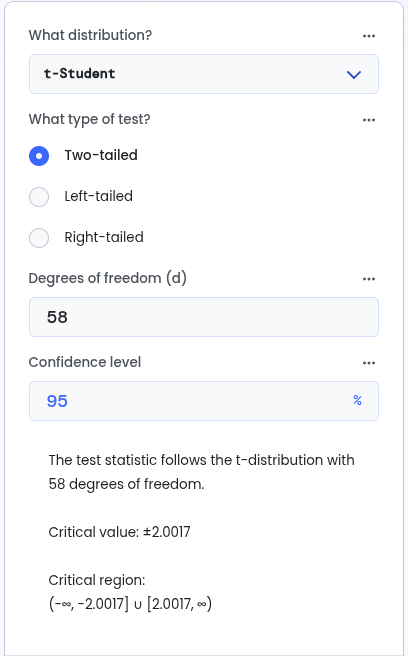
https://www.omnicalculator.com/statistics/critical-value

In [53]:
print("Statistical Significance : ", TS>2.002)

Statistical Significance :  False


In [54]:
m = TS*(SE_pool*(np.sqrt(1/N_C + 1/N_T)))
_, l, u = m, delta - m, delta + m
l, u

(0.2225403330758517, 0.3774596669241484)

In [55]:
print(f"Statistical Significance (TS={TS}): ", TS>2.002)
# print("Statistical Significance : ", not (l<=0 and u>0))
d_min = 0.05
print("Practical Significance : ", not (l<=d_min and u>d_min))

Statistical Significance (TS=1.0933525722877524):  False
Practical Significance :  True


### Welch's Test (different variance assumption, compute unpooled variance)

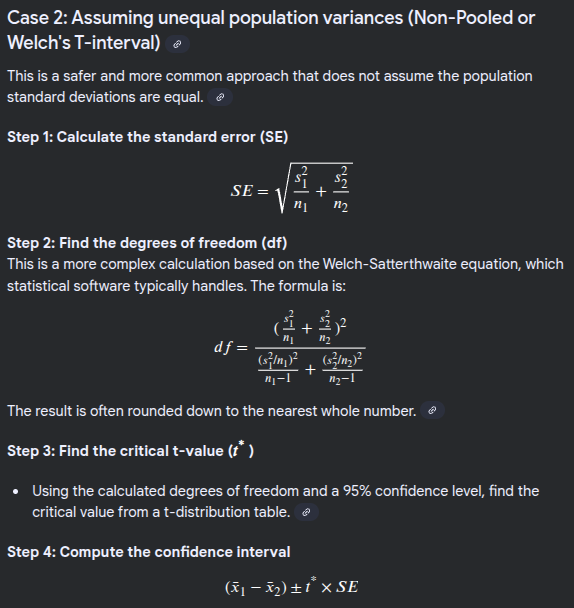


### Experiment: Similar product at checkout page
- Could increase revenue
- Concern
  - Distract Customers
  - may delay or abandon checkout

- Metrics: Revenue
- $N_C = N_T$
- Variants
  - control
    - checkout page
  - treatment
    - 1: Similar product at checkout page at the bottom
    - 2: Pop-up of similar product on checkout page
- Randomization Units
  - Users
  - Enough users for experiment (Assumption)
- Targeting
  - All Users?
  - Specific Segments of Users?
  - Users reaching checkout page 
- Sample Size??
  - Practrical Significance $\delta$ = $2/user
  - Power = 0.8
  - Significance level $\alpha$ = 0.05
  - $n = \frac{16 \sigma ^2 }{\delta ^2}$
  - if $\sigma = 20$, n=1600
  - for 3 variants 1600*3 = 4800 unique users
- Duration
  - atleast a week
- Seasonality
    - sale days (cannot be generalized)
- Primacy and novelty effect
- Launch if 
  - Practically Significant
  - Statistically Significant

|                 | Difference between T and C | p-value | CI        | Statistically Significant | Practically Significant |
| --------------- | -------------------------- | ------- | --------- | ------------------------- | ----------------------- |
|Treatment 1 vs C | 2.45                       | 0.055   | [-0.1, 5] | NO                        | NO                      |
|Treatment 2 vs C | 2.25                       | 0.0001  | [0.5 , 4] | YES                       | NO                      |
